**产生1个正态分布的随机数据**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
rng = np.random.RandomState(42) # 此命令将会产生一个随机状态种子,在该状态下生成的随机序列（正态分布）一定会有相同的模式。
                                # 但是，不同的随机种子状态将会有不同的数据生成模式。这一特点在随机数据生成的统计格式控制显得很重要。 
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y);

**导入线性回归模块**

In [2]:
from sklearn.linear_model import LinearRegression

**实例化LinearRegression类并用fit_intercept超参数设置是否想要拟合直线的截距**

In [3]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

**将数据整理成特征矩阵和目标数组**

In [4]:
X = x[:, np.newaxis]
X.shape

(50, 1)

**用模型拟合数据**

In [5]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

**fit()命令会在模型内部进行大量运算，运算结果将存储在模型属性中，供用户使用。
在Scikit-Learn中，所有通过fit()方法获得的模型参数都带一条下划线。**

In [6]:
model.coef_   ## 对样本数据拟合直线的斜率

array([1.9776566])

In [7]:
model.intercept_    ## 对样本数据拟合直线的截距

-0.903310725531111

**预测新数据的标签**

In [8]:
xfit = np.linspace(-1, 11)

In [9]:
xfit

array([-1.        , -0.75510204, -0.51020408, -0.26530612, -0.02040816,
        0.2244898 ,  0.46938776,  0.71428571,  0.95918367,  1.20408163,
        1.44897959,  1.69387755,  1.93877551,  2.18367347,  2.42857143,
        2.67346939,  2.91836735,  3.16326531,  3.40816327,  3.65306122,
        3.89795918,  4.14285714,  4.3877551 ,  4.63265306,  4.87755102,
        5.12244898,  5.36734694,  5.6122449 ,  5.85714286,  6.10204082,
        6.34693878,  6.59183673,  6.83673469,  7.08163265,  7.32653061,
        7.57142857,  7.81632653,  8.06122449,  8.30612245,  8.55102041,
        8.79591837,  9.04081633,  9.28571429,  9.53061224,  9.7755102 ,
       10.02040816, 10.26530612, 10.51020408, 10.75510204, 11.        ])

**将这些x值转换成[n_samples, n_fea-tures]的特征矩阵形式，之后将其输入到模型中**

In [10]:
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

**把原始数据和拟合结果都可视化出来**

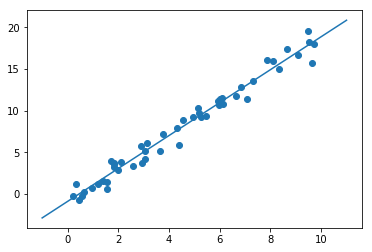

In [11]:
plt.scatter(x, y)
plt.plot(xfit, yfit);

In [13]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

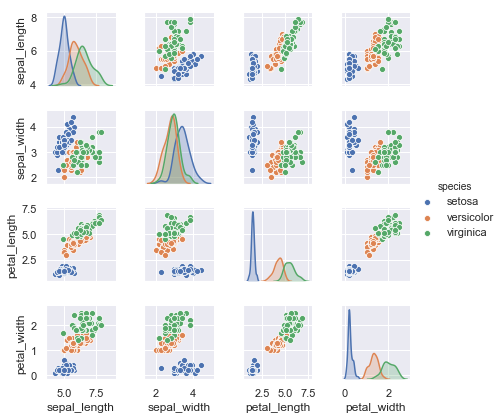

In [14]:
%matplotlib inline
sns.set()       
sns.pairplot(iris, hue='species', height=1.5);

In [15]:
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [16]:
y_iris = iris['species']       
y_iris.shape

(150,)

In [17]:
from sklearn.cross_validation import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris,random_state=1)

In [18]:
from sklearn.naive_bayes import GaussianNB # 1.选择模型类        
model = GaussianNB()                       # 2.初始化模型        
model.fit(Xtrain, ytrain)                  # 3.用模型拟合数据        
y_model = model.predict(Xtest)             # 4.对新数据进行预测

In [19]:
from sklearn.metrics import accuracy_score        
accuracy_score(ytest, y_model)

0.9736842105263158